In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [2]:
def load_ith_data(file_path,index):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    for data in fileslist:
        if data.find('Rewards')!=-1 and data[-5]== str(index):
            rewards = np.load(file_path+'/' +data)[0:101]
        elif data.find('success')!=-1 and data[-5]== str(index):
            s_rate = np.load(file_path+'/' +data)[0:101]
        elif data.find('steps')!=-1 and data[-5]== str(index):
            steps = np.load(file_path+'/' +data)[0:101]
    train_epoch = np.arange(0,101,5)
    df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Steps':steps,'Train epoch':train_epoch,'repeat':str(index),'schema':file_path})
    return df

In [3]:
def load_vdn_data(file_path):
    fileslist  = os.listdir(file_path)
    total_data = []
    for i in range(5):
        df = load_ith_data(file_path,i)
        total_data.append(df)
    total_data = pd.concat(total_data,axis=0)
    return total_data

In [4]:
def load_ppo_data(file_path,maxiter,spacing):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    total_data=[]
    for i in range(5):
        for data in fileslist:
            if data.find('rewards')!=-1:
                rewards = np.load(file_path+'/' +data)[i][0:]
            elif data.find('success')!=-1:
                s_rate = np.load(file_path+'/' +data)[i][0:]
            elif data.find('steps')!=-1 :
                steps = np.load(file_path+'/' +data)[i][0:]
        train_epoch = np.arange(0,maxiter+1,spacing)
        df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Steps':steps,'Train epoch':train_epoch,'repeat':str(i),'schema':file_path})
        total_data.append(df)
    total_data = pd.concat(total_data,axis=0)
    return total_data

In [6]:
a = load_vdn_data('vdn')
b = load_vdn_data('vdn-n')
c = load_vdn_data('vdn-fov9')
d = load_vdn_data('vdn-crnn')
e = load_vdn_data('vdn-f9-256')
print(e)

ValueError: arrays must all be same length

In [5]:
c = pd.concat([a,b,c,d,e],axis=0)
sns.set_style('darkgrid')

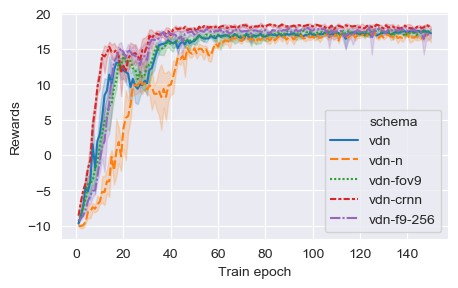

In [6]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Rewards',hue='schema',style='schema',data=c)

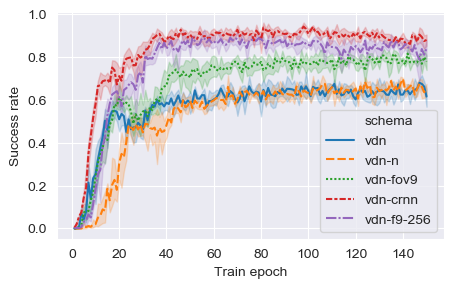

In [7]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Success rate',hue='schema',style='schema',data=c)

In [9]:
plt.figure(dpi=100,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Steps',hue='schema',style='schema',data=c)

NameError: name 'c' is not defined

<Figure size 500x300 with 0 Axes>

In [5]:
a = load_vdn_data('vnd-2d')
aa =  a[a['Train epoch'] %5==0]


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'vnd-2d'

In [16]:
b = load_ppo_data('ppo-2d',200,2)


In [17]:
c = pd.concat([aa,b],axis=0)
last  = a[a['Train epoch'] == 150]

In [18]:
x = np.arange(150,201)
y_s = np.ones(201-150)*[np.sum(last['Success rate'])/len(last)]
y_step = np.ones(201-150)*[np.sum(last['Steps'])/len(last)]
y_r = np.ones(201-150)*[np.sum(last['Rewards'])/len(last)]

In [19]:
sns.set_style('darkgrid')

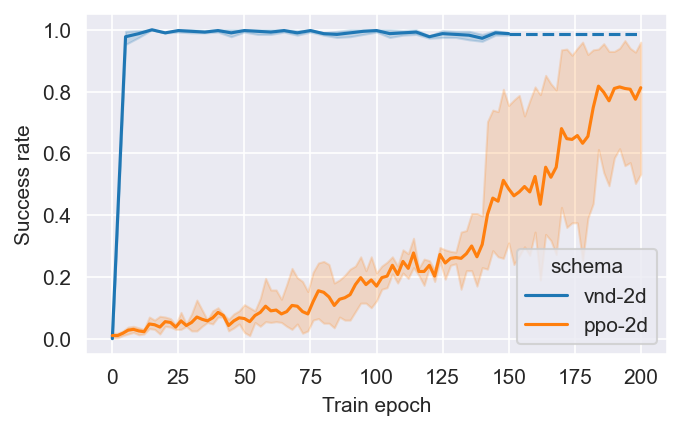

In [20]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=c)
ax1 = plt.plot(x,y_s,linestyle = '--',color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765))

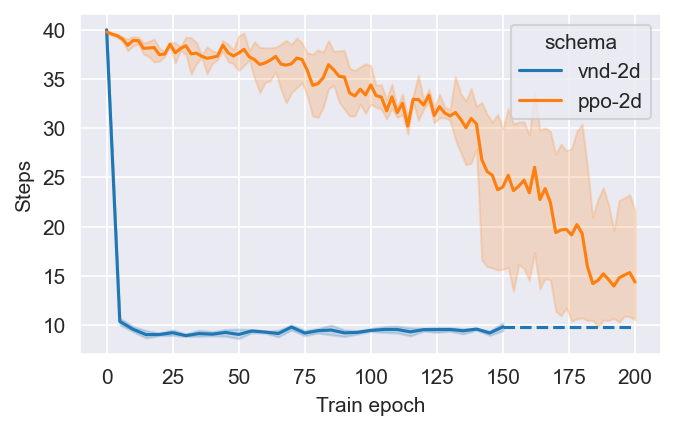

In [37]:
fig,ax1 = plt.subplots(dpi=150,figsize=(5,3))
ax1 = sns.lineplot(x='Train epoch',y='Steps',hue='schema',data=c)
ax1 = plt.plot(x,y_step,linestyle = '--',color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765))

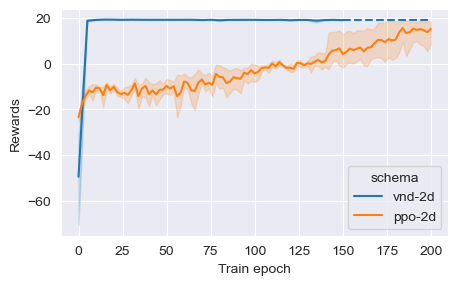

In [35]:
fig,ax1 = plt.subplots(dpi=100,figsize=(5,3))
ax1 = sns.lineplot(x='Train epoch',y='Rewards',hue='schema',data=c)
ax1 = plt.plot(x,y_r,linestyle = '--',color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765))

In [44]:
d3 = load_vdn_data('vdn-3d')
d3p=load_ppo_data('ppo-3d',200,2)
dd3 =  d3[d3['Train epoch'] %5==0]
d3total=pd.concat([dd3,d3p])
c = pd.concat([aa,b],axis=0)
last  = d3[d3['Train epoch'] == 150]
x = np.arange(150,201)
y_s = np.ones(201-150)*[np.sum(last['Success rate'])/len(last)]
y_step = np.ones(201-150)*[np.sum(last['Steps'])/len(last)]
y_r = np.ones(201-150)*[np.sum(last['Rewards'])/len(last)]

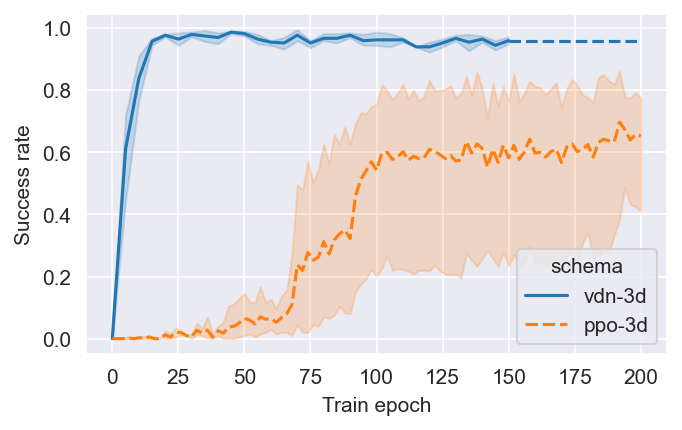

In [45]:
fig,ax1 = plt.subplots(dpi=150,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Success rate',hue='schema',style='schema',data=d3total)
ax1 = plt.plot(x,y_s,linestyle = '--',color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765))

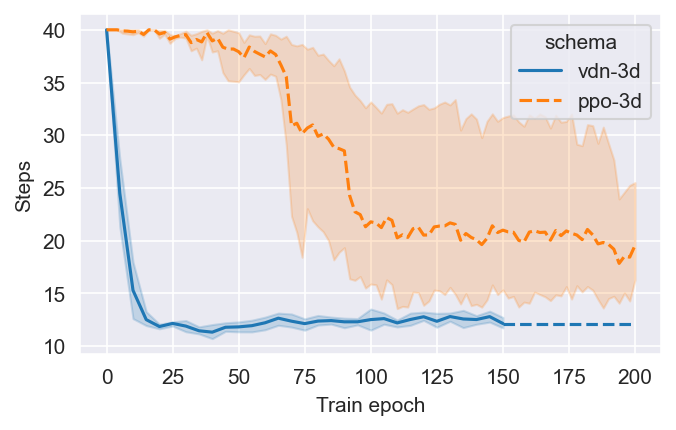

In [46]:
fig,ax1 = plt.subplots(dpi=150,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Steps',hue='schema',style='schema',data=d3total)
ax1 = plt.plot(x,y_step,linestyle = '--',color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765))

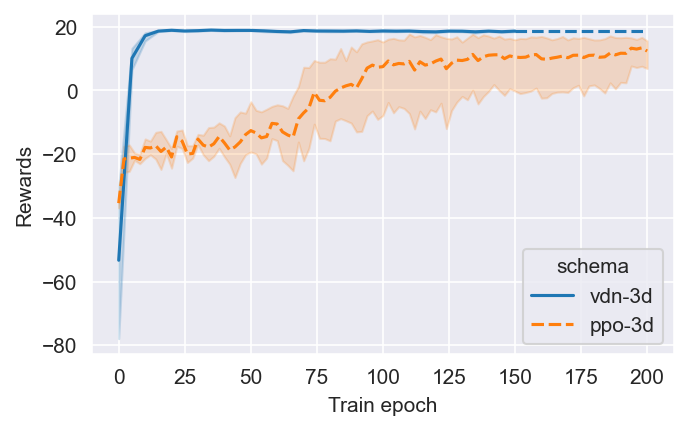

In [47]:
fig,ax1 = plt.subplots(dpi=150,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Rewards',hue='schema',style='schema',data=d3total)
ax1 = plt.plot(x,y_r,linestyle = '--',color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765))

In [10]:
d4 = load_vdn_data('vdn-crnn')
dd4 =  d4[d4['Train epoch'] %5==0]

<AxesSubplot:xlabel='Train epoch', ylabel='Rewards'>

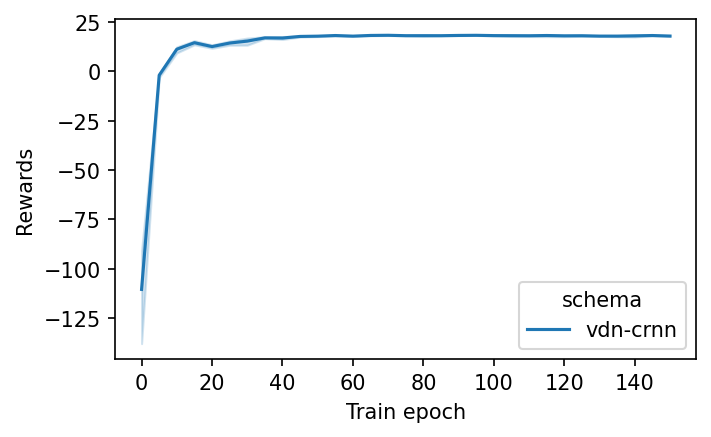

In [12]:
fig,ax1 = plt.subplots(dpi=150,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Rewards',hue='schema',style='schema',data=dd4)

<AxesSubplot:xlabel='Train epoch', ylabel='Success rate'>

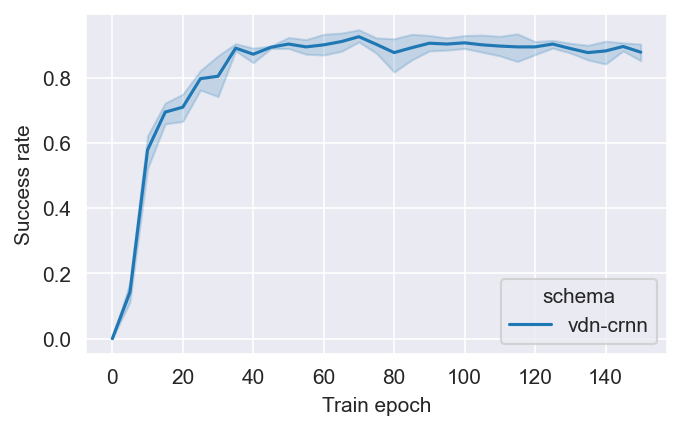

In [21]:
fig,ax1 = plt.subplots(dpi=150,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Success rate',hue='schema',style='schema',data=dd4)

<AxesSubplot:xlabel='Train epoch', ylabel='Steps'>

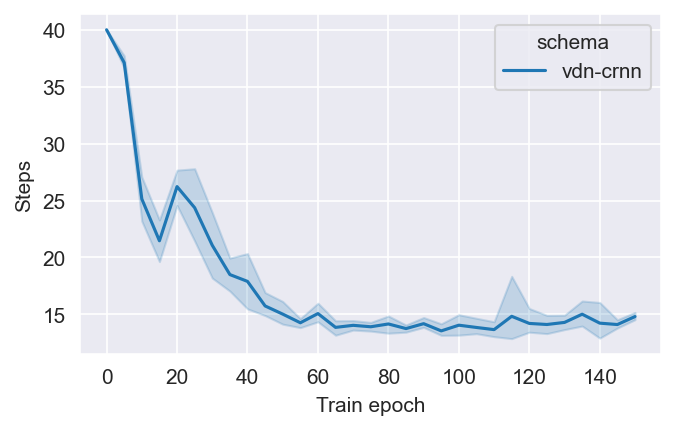

In [22]:
fig,ax1 = plt.subplots(dpi=150,figsize=(5,3))
sns.lineplot(x='Train epoch',y='Steps',hue='schema',style='schema',data=dd4)